<a href="https://colab.research.google.com/github/maya034/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

STATE: 51 Unique States

Account Length. Length of The Account

Area Code 415 relates to San Francisco,408 is of San Jose and 510 is of City of Okland

International Plan Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

Voice Mail Plan Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

Number vmail messages Number of Voice Mail Messages ranging from 0 to 50

Total day minutes Total Number of Minutes Spent By Customers in Morning

Total day calls Total Number of Calls made by Customer in Morning.

Total day charge Total Charge to the Customers in Morning.

Total eve minutesTotal Number of Minutes Spent By Customers in Evening

Total eve calls Total Number of Calls made by Customer in Evening.

Total eve charge Total Charge to the Customers in Morning.

Total night minutes Total Number of Minutes Spent By Customers in the Night.

Total night calls Total Number of Calls made by Customer in Night.

Total night charge Total Charge to the Customers in Night. 

## New Section

In [28]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
working_path='/content/drive/MyDrive/Colab Notebooks/Telecom Churn.csv'
df=pd.read_csv(working_path)

In [5]:
df.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
df[['State','Churn']]

,State,Churn
0,KS,False
1,OH,False
2,NJ,False
3,OH,False
4,OK,False
...,...,...
3328,AZ,False
3329,WV,False
3330,RI,False
3331,CT,False


In [9]:
s=df.groupby('State')['Churn'].value_counts().sort_values(ascending=True)

In [10]:
st=pd.DataFrame(s)

In [11]:
st

,,Churn
State,Churn,
AK,True,3
IA,True,3
HI,True,3
LA,True,4
AZ,True,4
...,...,...
MN,False,69
WI,False,71
AL,False,72


In [12]:
len(set(list(df['State'])))

51

In [13]:
df['State'].nunique()

51

In [14]:
df['Area code'].nunique()

3

In [15]:
df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

In [16]:
df.groupby('Area code')['State'].value_counts(normalize=True)

Area code  State
408        AL       0.029833
           CO       0.029833
           NC       0.029833
           NH       0.029833
           VA       0.029833
                      ...   
510        LA       0.013095
           MO       0.013095
           NM       0.013095
           CA       0.011905
           HI       0.009524
Name: State, Length: 153, dtype: float64

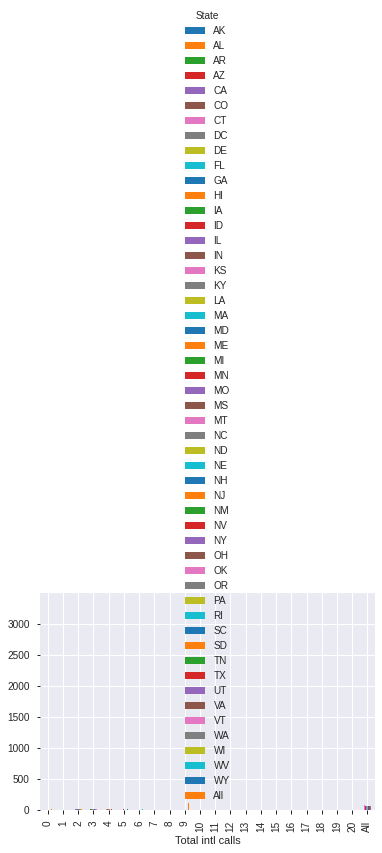

In [32]:
pd.crosstab(df['Total intl calls'],df['State'],margins=True).plot(kind='bar')
#pd.crosstab(df['Total intl calls'],df['State'],normalize='index').plot(kind='bar')

In [25]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

In [ ]:
df.isna().sum()

In [41]:
a=df['Total intl minutes'].describe()

In [42]:
b=df['Total intl calls'].describe()

In [43]:
c=df['Total intl charge'].describe()

In [47]:
intl_call=pd.DataFrame(a,b,c)

In [48]:
intl_call

Total intl charge,3333.000000,2.764581,0.753773,0.000000,2.300000,2.780000,3.270000,5.400000
Total intl calls,,,,,,,,
3333.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.479448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.461214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
